### Tokenization
The first step in building an LLM is Data Preparation and Sampling.
There are 3 steps in Data Preparation and Sampling - 
1. We divide our entire text data into smaller tokens/words.
2. Each token/word is assigned a token ID.
3. Each token ID is converted into a vector embedding and then it has to be passed to the LLM.

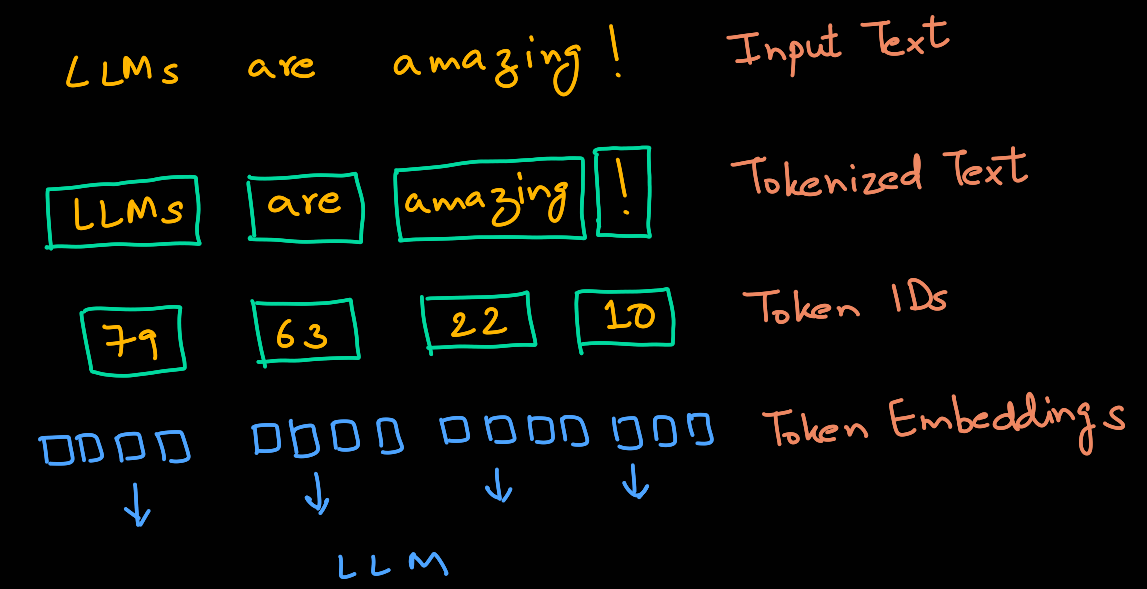

We will try to tokenize this text - "The Verdict" by Edith Wharton. Let's start!

In [1]:
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

Now, let's open the text and see this

In [2]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of characters:", len(raw_text))
print(raw_text[:99])

Total number of characters: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


Our goal is to tokenize this long story into individual words and tokens

### Regular Expressions
This will help us to tokenise and split the given text based on whitespaces, commas and full stops.

In [3]:
import re
text = "Hey, this is a test for regular expressions"
print(re.split(r'(\s)', text))

['Hey,', ' ', 'this', ' ', 'is', ' ', 'a', ' ', 'test', ' ', 'for', ' ', 'regular', ' ', 'expressions']


As you can see here, it splits the sentence at the 'space' level. This gets divided into separate tokens. Now, we want the fullstops and the commas to be separated as well.

In [5]:
result = re.split(r'([,.]|\s)',text)
print(result)

['Hey', ',', '', ' ', 'this', ' ', 'is', ' ', 'a', ' ', 'test', ' ', 'for', ' ', 'regular', ' ', 'expressions']


Now, each and every punctuation is also tokenised. We can remove the redundant whitespaces.

In [6]:
result = [x for x in result if x.strip()]
print(result)

['Hey', ',', 'this', 'is', 'a', 'test', 'for', 'regular', 'expressions']


Removing whitespaces from a text totally depends on the use-case that you are training the LLM for. For example, if you want to train an LLM to understand python codes, it is very important to include spaces because python depends heavily on indentation. 

In [7]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


We have built a simple tokeniser in just 2 lines! That's awesome

### Token IDs
Now, let's assign token IDs to these tokens that we have computed

In [9]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
result = [item.strip() for item in preprocessed if item.strip()]
print(result)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

In [39]:
all_tokens = sorted(set(result))
print(all_tokens)

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon-dancers', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_', 'a', 'abdication', 'able', 'about', 'above',

In [33]:
vocab = {token:id for id,token in enumerate(all_tokens)}
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

We have sorted the words in alphabetical order and then we have assigned a number to each token

### Tokenizer Class
Now, let's build a tokenizer class. This class will also take care if there are some unknown words in the text. These tokens are called special tokens which serve special purpose. They can denote the end of text and can also substitute unknown words.

In [40]:
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [45]:
len(vocab.items())

1132

In [46]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [52]:
class SimpleTokenizer:
    def __init__(self, vocab):
        self.str_to_id = vocab
        self.id_to_str = { i:s for s,i in vocab.items()}
    
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_id 
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_id[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.id_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [53]:
tokenizer = SimpleTokenizer(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [55]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [56]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'